## TOC:
* [Introduct Assignment](#1.1)
* [Second Bullet Header](#1.2)

# Setup System

<a id="1.1"></a> 
## <span style="color:red"> 1. Sumary </span>
***

## <span style="color:red"> 2. Hypothisis </span>
***

- High Weight likely get more positive stepsis
- High Age likely get positive stepsis


In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vecstack

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


## 2.1 Import necessary library

In [6]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics
 
"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import tree

"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score\



"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

[MLENS] backend: threading


In [7]:
"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

## 2.2 Import data

### Import Train dataset

In [9]:
train = pd.read_csv("Paitients_Files_Train.csv")

In [10]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


### Import Test dataset

In [12]:
test = pd.read_csv("Paitients_Files_Test.csv")

In [13]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## 2.3 Drop column ID and Insurance

In [14]:
features = ["PRG","PL","PR","SK","TS","M11","BD2","Age","Insurance"]

## Rename Column Sepssis to Sepsis

In [15]:
#rename
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)
test.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

## Change Sepsis to 0 (negative) and 1 (positive)

In [16]:
import numpy
train.loc[train['Sepsis'].isin(['Positive']), 'Sepsis'] = '1'
train.loc[train['Sepsis'].isin(['Negative']), 'Sepsis'] = '0'
train['Sepsis'] = train['Sepsis'].astype('int')
numpy.array(train['Age'],dtype='int64')

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31,
       31, 33, 32, 27, 50, 41, 29, 51, 41, 43, 22, 57, 38, 60, 28, 22, 28,
       45, 33, 35, 46, 27, 56, 26, 37, 48, 54, 40, 25, 29, 22, 31, 24, 22,
       26, 30, 58, 42, 21, 41, 31, 44, 22, 21, 39, 36, 24, 42, 32, 38, 54,
       25, 27, 28, 26, 42, 23, 22, 22, 41, 27, 26, 24, 22, 22, 36, 22, 37,
       27, 45, 26, 43, 24, 21, 34, 42, 60, 21, 40, 24, 22, 23, 31, 33, 22,
       21, 24, 27, 21, 27, 37, 25, 24, 24, 46, 23, 25, 39, 61, 38, 25, 22,
       21, 25, 24, 23, 69, 23, 26, 30, 23, 40, 62, 33, 33, 30, 39, 26, 31,
       21, 22, 29, 28, 55, 38, 22, 42, 23, 21, 41, 34, 65, 22, 24, 37, 42,
       23, 43, 36, 21, 23, 22, 47, 36, 45, 27, 21, 32, 41, 22, 34, 29, 29,
       36, 29, 25, 23, 33, 36, 42, 26, 47, 37, 32, 23, 21, 27, 40, 41, 60,
       33, 31, 25, 21, 40, 36, 40, 42, 29, 21, 23, 26, 29, 21, 28, 32, 27,
       55, 27, 57, 52, 21, 41, 25, 24, 60, 24, 36, 38, 25, 32, 32, 41, 21,
       66, 37, 61, 26, 22

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 49.3+ KB


### Splitting dataset into X and Y

In [18]:
X = train[features]
y = train["Sepsis"]



## Check data of X

In [19]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
## Check data of Y

In [21]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Sepsis, dtype: int32

# 3. Check corelation for dropping
***

In [22]:
corelation = train.corr()

<AxesSubplot:>

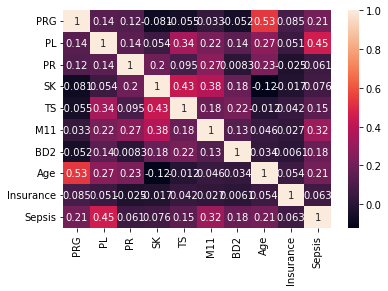

In [23]:
sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels=corelation.columns,annot=True)

C:\Users\William\AppData\Local\Temp/ipykernel_3028/4104708637.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



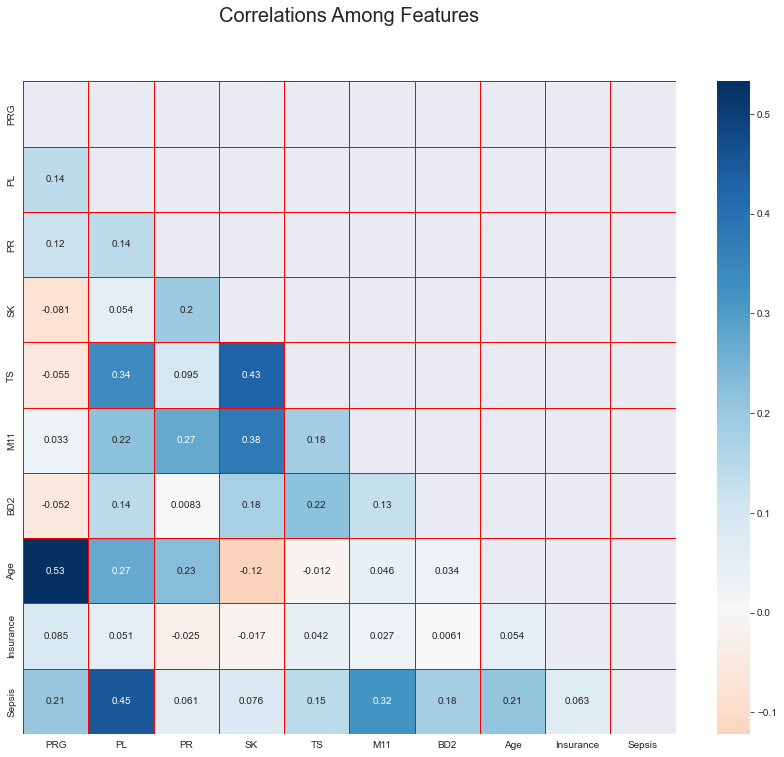

In [24]:
import matplotlib.style as style
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('darkgrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='red',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## <span style="color:blue"> Comment : </span>
 All corelation is under 50% so all data is fine
 
#### Positive Correlation Features:
- PL and Sepsis: 

#### Negative Correlation Features:
- No negative features



## 3.1 Histogram

<Figure size 432x288 with 0 Axes>

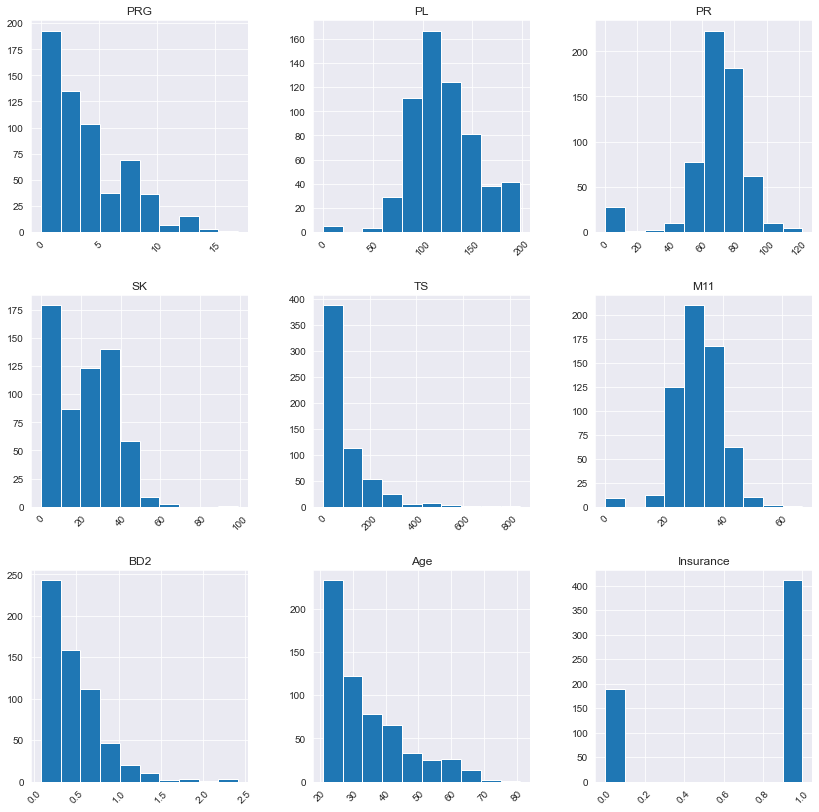

In [25]:
plt.figure()
X.hist(figsize=(14,14), xrot=45)
plt.show()

## <span style="color:blue"> Comment: </span>
PRG ,SK ,TS ,BD2 have the same distribute
PL , PR ,M11 have the same distribution

## 3.2 Statistic of dataset

In [26]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [27]:
sepsis_summary = train.groupby("Insurance")
sepsis_summary.mean().reset_index()

,Insurance,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,0,3.404255,117.691489,69.457447,20.973404,72.303191,31.602660,0.478138,32.340426,0.303191
1,1,4.017032,121.279805,68.401460,20.374696,82.734793,32.065207,0.482582,33.725061,0.367397


## <span style="color:blue">  Comment: </span>
<li>This train data set has 601 raw and 9 columns.</li>
<li>only 34% patient got positive.</li>


# <span style="color:red"> 4. Outliers detection</span>

In [28]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered


"""#2.Create another function to plot boxplot with and without outliers."""
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [29]:
"""Plot Age with and without outliers."""
plotBoxPlot(X.Age,removeOutliers(X.Age))

In [30]:
"""Plot Weight with and without outliers."""
plotBoxPlot(X.M11,removeOutliers(X.M11))


In [31]:
merged = pd.concat([train, test], sort = False).reset_index(drop=True)

## Bivariate Analysis

In [32]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = train.iloc[:599, :]
df_test = train.iloc[599:, :]

"""#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation."""
def boxplotAndCorrelation(numVariable,catVariable=df_train.Sepsis):
    """Return boxplot between a categorical and numerical variable. Also calculates biserial correlation.
    numVariable = a numerical variable of interest."""
    # Calculate point biserial correlation and p value
    biserialCorr = stats.pointbiserialr(numVariable,catVariable)[0].round(2)
    pValue = stats.pointbiserialr(numVariable,catVariable)[1].round(5)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots boxplot of categorical variable vs numerical variable
    fig.add_trace(
        go.Box(
            x = catVariable,
            y = numVariable,
            marker_color="lightseagreen",
            ))
    
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Association between {catVariable.name} and {numVariable.name} (corr: {biserialCorr}, p: {pValue})",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>{numVariable.name}</b>")
    return fig.show()


"""#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean."""
def numGroupedByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns a barplot showing mean of numerical variable across the class of categorical variable."""
    
    # Calculates mean across different classes of categorical variable
    numGroupedByCat = numVariable.groupby(catVariable).mean().round(2)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots barplot
    fig.add_trace(
        go.Bar(
            x = numGroupedByCat.index,
            y = numGroupedByCat,
            text=numGroupedByCat,
            hoverinfo="x+y",
            textposition="auto",
            textfont=dict(family="sans serif",size=15)
        ))
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Mean {numVariable.name} across {catVariable.name}",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>Mean {numVariable.name}</b>")
    return fig.show()

    
"""#3.This function plots histogram of numerical variable for every class of categorical variable."""
def numHistByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns numerical variable distribution across classes of categorical variable."""
    fig,ax = plt.subplots(1,1,figsize = (18,7))
    font_size = 15
    title_size = 18
    numVariable[catVariable==1].hist(bins=50,color="green", label = "survived", grid = False, alpha=0.5)
    numVariable[catVariable==0].hist(bins=50,color="red", label = "died", grid = False, alpha=0.5)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=font_size)
    ax.set_xlabel(f"{numVariable.name}", fontsize = font_size)
    ax.set_title(f"{numVariable.name} Distribution of Survivors vs Victims", fontsize = title_size)
    plt.legend()
    return plt.show()

   
"""#4.Create a function to calculate anova between numerical and categorical variable."""
def calculateAnova(numVariable, catVariable=df_train.Sepsis):
    """Returns f statistics and p value after anova calculation."""
    
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    groupNumVariableByCatVariable0 = numVariable[catVariable==0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    # Calculate one way anova
    fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) # Calculate f statistics and p value
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

In [33]:
"""Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.Age)

In [34]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.Age)

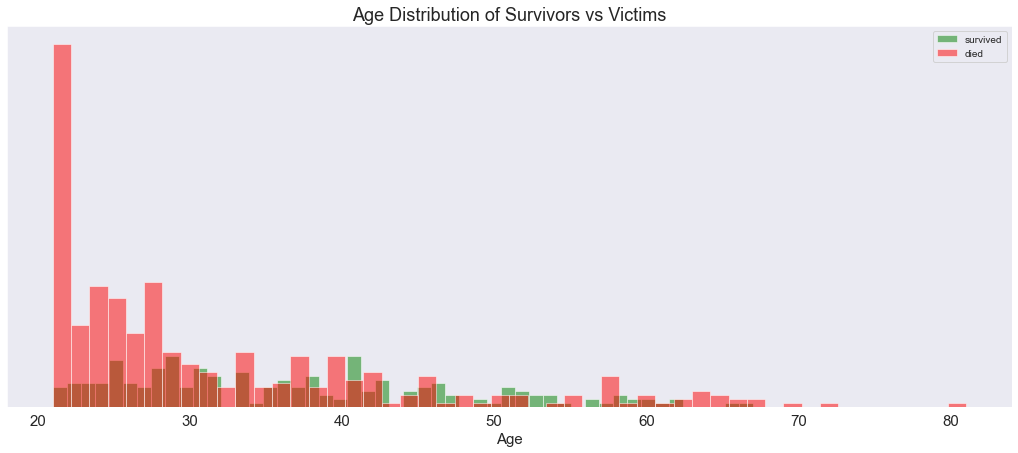

In [35]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.Age)

In [36]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.Age)

'Anova Result between Age & Sepsis: f=> 27.606648820443404, p=> 2.07187788918825e-07'

In [37]:
"""Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.M11)

In [38]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.M11)

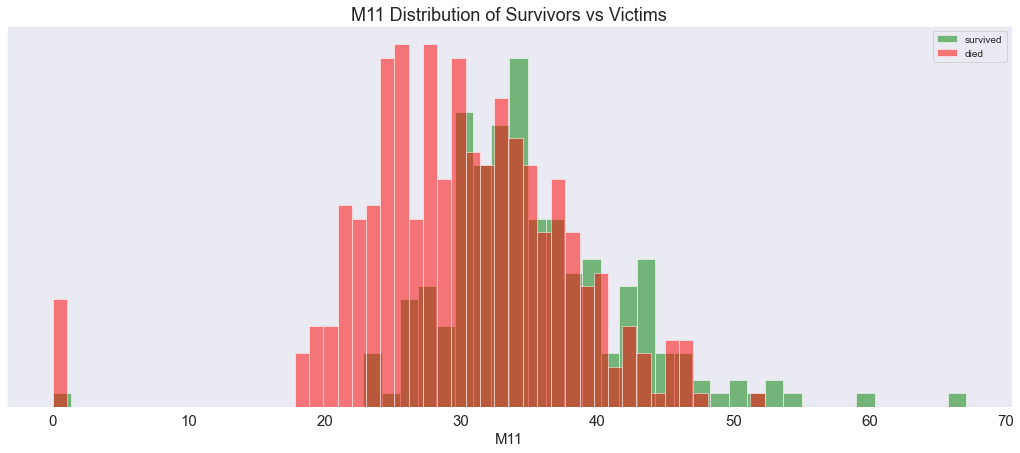

In [39]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.M11)

In [40]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.M11)

'Anova Result between M11 & Sepsis: f=> 66.1777664049268, p=> 2.3972519626647427e-15'

# <span style="color:red">  5. Data processing </span>
***

# <span style="color:red">  5. Data processing </span>
***

In [41]:
# Outlier detection 
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(X,2,["Age","PRG","M11","BD2"])

In [42]:
X.loc[Outliers_to_drop] # Show the outliers rows

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance


# No outliner

## Input missing value

### Comment: 
- There is no missing value
***

In [43]:


print (train.info())
print ("*"*40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 49.3+ KB
None
****************************************


<li>We may dont have missing values in our features.</Li>

### M11 filter Groupby

In [44]:
# Filter m11 using groupby
train.loc[(train["M11"] == 0), 'M11'] = np.nan
train['M11'] = train.groupby('Age')['M11'].apply(lambda x: x.fillna(x.median()))

### PL

In [45]:
# Filter pl using groupby
train.loc[(train["PL"] == 0), 'PL'] = np.nan
train['PL'] = train.groupby('Age')['PL'].apply(lambda x: x.fillna(x.median()))

# <span style="color:red"> 5. EDA </span>
***
Before we dive into finding relations between independent variables and our dependent variable(Sepsis), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- PRG: High will get sepsis
- M11  : Obese will likely get sepsis
- AGE : old is likely get sepsis than young


## Percent of people having sepsis

<Figure size 1440x576 with 0 Axes>

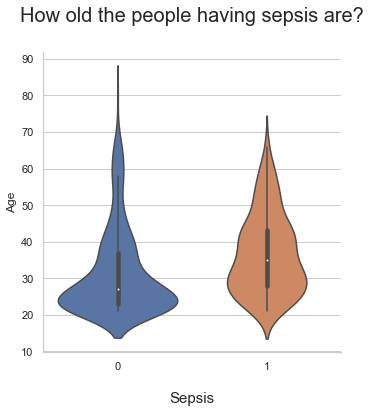

In [46]:
fig = plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='Age',
            kind="violin", data=train)
plt.title('How old the people having sepsis are?', fontsize = 20, pad = 30)
plt.ylabel("Age")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);



## <span style="color:blue">  Comment: </span>
Observe from the plot , patients get sepsis mostly more than 30
***

## <span style="color:blue"> Comment: </span>
Begin from 31 the positive tends to dominance negative which means people > 30 get sepsis more than young people
***

## Weight vs Sepsis

<Figure size 2880x2160 with 0 Axes>

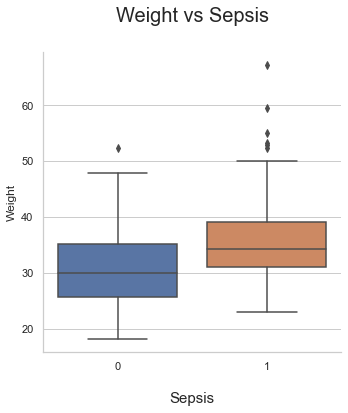

In [47]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='M11',
            kind="box", data=train)
plt.title('Weight vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("Weight")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

## <span style="color:blue"> Comment: </span>
People are obese likely get sepsis
***

<Figure size 2880x2160 with 0 Axes>

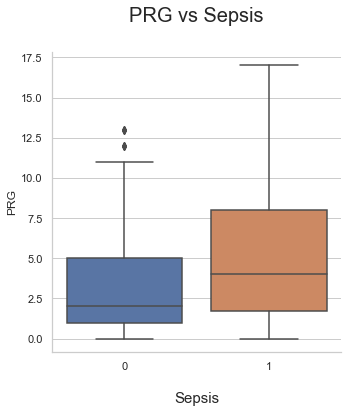

In [48]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='PRG',
            kind="box", data=train)
plt.title('PRG vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("PRG")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

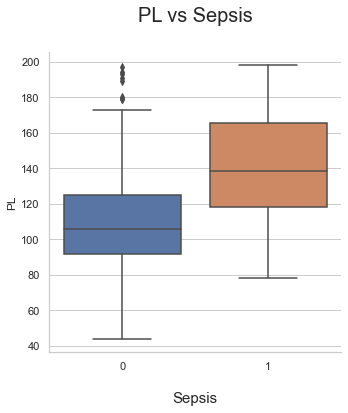

In [49]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='PL',
            kind="box", data=train)
plt.title('PL vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("PL")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

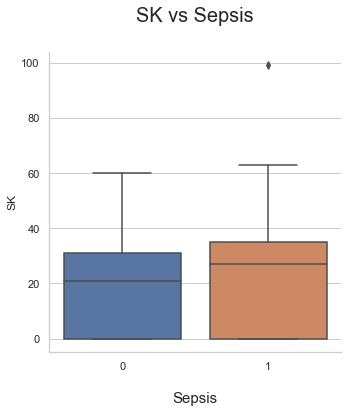

In [50]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='SK',
            kind="box", data=train)
plt.title('SK vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("SK")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

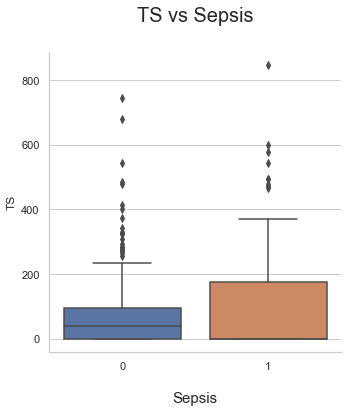

In [51]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='TS',
            kind="box", data=train)
plt.title('TS vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("TS")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

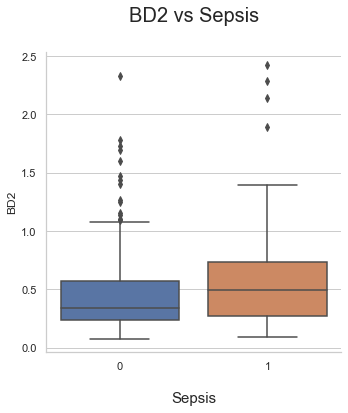

In [52]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='BD2',
            kind="box", data=train)
plt.title('BD2 vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("BD2")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

In [53]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

## Data transformation

In [54]:
# """Create bin categories for Age."""
# ageGroups = ["infant","child","teenager","youngAdult","adult","aged"]

# """Create range for each bin categories of Age."""
# groupRanges = [0,5,12,18,35,60,81]

# """Create and view categorized Age with original Age."""
# X["ageBinned"] = pd.cut(X.Age, groupRanges, labels = ageGroups)
# bold('**Age with Categorized Age:**')
# display(X[['Age', 'ageBinned']].head(2))

In [55]:
display(X.dtypes)

PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
dtype: object

In [56]:
# """Drop the features that would not be useful anymore."""
# X.drop(columns = ["Age"], inplace = True, axis = 1)

# """Features after dropping."""
# bold("Features Remaining after Dropping:")
# display(X.columns)

In [57]:
# """Convert categorical data into numeric to feed our machine learning model."""
# X = pd.get_dummies(X)

# """Let's visualize the updated dataset that would be fed to our machine learning algorithms."""
# bold("Preview of Processed Data:")
# display(X.head(2))

In [58]:
"""Create bin categories for Age."""
weightGroups = ["slim","normal","fat"]

"""Create range for each bin categories of Age."""
groupRanges = [0,30,55,90]

"""Create and view categorized Age with original Age."""
X["M11Binned"] = pd.cut(X.M11, groupRanges, labels = weightGroups)
bold('**Age with Categorized Age:**')
display(X[['M11', 'M11Binned']].head(2))

C:\Users\William\AppData\Local\Temp/ipykernel_3028/3369931856.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



****Age with Categorized Age:****

,M11,M11Binned
0,33.6,normal
1,26.6,slim


In [59]:
"""Create bin categories for Age."""
ageGroups = ["infant","child","teenager","youngAdult","adult","aged"]

"""Create range for each bin categories of Age."""
groupRanges = [0,5,12,18,35,60,81]

"""Create and view categorized Age with original Age."""
X["ageBinned"] = pd.cut(X.Age, groupRanges, labels = ageGroups)
bold('**Age with Categorized Age:**')
display(X[['Age', 'ageBinned']].head(2))

****Age with Categorized Age:****

,Age,ageBinned
0,50,adult
1,31,youngAdult


In [60]:
"""Convert categorical data into numeric to feed our machine learning model."""
X = pd.get_dummies(X)

"""Let's visualize the updated dataset that would be fed to our machine learning algorithms."""
bold("Preview of Processed Data:")
display(X.head(2))

**Preview of Processed Data:**

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,M11Binned_slim,M11Binned_normal,M11Binned_fat,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged
0,6,148,72,35,0,33.6,0.627,50,0,0,1,0,0,0,0,0,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,0,0,0,1,0,0


In [61]:
"""Drop the features that would not be useful anymore."""
X.drop(columns = ["M11","Age"], inplace = True, axis = 1)


In [62]:
X.head(2)

,PRG,PL,PR,SK,TS,BD2,Insurance,M11Binned_slim,M11Binned_normal,M11Binned_fat,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged
0,6,148,72,35,0,0.627,0,0,1,0,0,0,0,0,1,0
1,1,85,66,29,0,0.351,0,1,0,0,0,0,0,1,0,0


## Age 

## Correcting Data Types

# <span style="color:red"> 5. Traning Machine Learning Model </span>
***

In [63]:
X.head()

,PRG,PL,PR,SK,TS,BD2,Insurance,M11Binned_slim,M11Binned_normal,M11Binned_fat,ageBinned_infant,ageBinned_child,ageBinned_teenager,ageBinned_youngAdult,ageBinned_adult,ageBinned_aged
0,6,148,72,35,0,0.627,0,0,1,0,0,0,0,0,1,0
1,1,85,66,29,0,0.351,0,1,0,0,0,0,0,1,0,0
2,8,183,64,0,0,0.672,1,1,0,0,0,0,0,1,0,0
3,1,89,66,23,94,0.167,1,1,0,0,0,0,0,1,0,0
4,0,137,40,35,168,2.288,1,0,1,0,0,0,0,1,0,0


## 5.1 Pre-Modeling Tasks

In [64]:
from sklearn.model_selection import train_test_split
seed = 43
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.8 , test_size = 0.2 , random_state=0)

In [65]:
"""See the dimensions of input and output data set."""
print(f"Input Matrix Dimension: {X_train.shape}")
print(f"Output Vector Dimension: {y_train.shape}")
print(f"Test Data Dimension: {X_test.shape}")

Input Matrix Dimension: (479, 16)
Output Vector Dimension: (479,)
Test Data Dimension: (120, 16)


In [66]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [67]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

In [68]:
"""Building machine learning models: 
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

"""Now initialize all the classifiers object."""
"""#1.Logistic Regression"""
lr = LogisticRegression()

"""#3.Random Forest Classifier"""
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed,ccp_alpha=0.01)



"""List of all the models with their indices."""
modelNames = ["LR","RF", "DT"]
models = [lr,rf,dt]

In [69]:
"""Create a function that returns train accuracy of different models."""
def calculateTrainAccuracy(model):
    """Returns training accuracy of a model."""
    
    model.fit(X_train, y_train)
    trainAccuracy = model.score(X_train, y_train)
    trainAccuracy = round(trainAccuracy*100, 2)
    return trainAccuracy

# Calculate train accuracy of all the models and store them in a dataframe
modelScores = list(map(calculateTrainAccuracy, models))
trainAccuracy = pd.DataFrame(modelScores, columns = ["trainAccuracy"], index=modelNames)
trainAccuracySorted = trainAccuracy.sort_values(by="trainAccuracy", ascending=False)
bold("Training Accuracy of the Classifiers:")
display(trainAccuracySorted)

C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Training Accuracy of the Classifiers:**

,trainAccuracy
RF,100.00
LR,79.12
DT,79.12


## K-Fold Cross Validation 

In [70]:
"""Create a function that returns mean cross validation score for different models."""
def calculateXValScore(model):
    """Returns models' cross validation scores."""
    
    xValScore = cross_val_score(model, X_train, y_train, cv = 10, scoring="accuracy").mean()
    xValScore = round(xValScore*100, 2)
    return xValScore

# Calculate cross validation scores of all the models and store them in a dataframe
modelScores = list(map(calculateXValScore, models))
xValScores = pd.DataFrame(modelScores, columns = ["xValScore"], index=modelNames)
xValScoresSorted = xValScores.sort_values(by="xValScore", ascending=False)
bold("Models 10-fold Cross Validation Score:")
display(xValScoresSorted)

C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\William\anaconda3\lib\site-pa

**Models 10-fold Cross Validation Score:**

,xValScore
LR,78.30
RF,76.21
DT,74.93


## Hypertunning 

In [71]:
"""Define all the models" hyperparameters one by one first::"""

"""Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned."""
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}


"""For DT, the following hyperparameters are usually tunned."""
dtParams = {"max_features": ["auto", "sqrt", "log2"],
            "max_depth": [2,4,6],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[seed]}

"""For RF, the following hyperparameters are usually tunned."""
rfParams = {"criterion":["gini","entropy"],
            "max_depth": [2,4,6],
             "n_estimators":[10, 15, 20, 25, 30],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "random_state":[44]}



In [72]:
"""Create a function to tune hyperparameters of the selected models."""
def tuneHyperparameters(model, params):
    """Returns best score of a model and its corresponding hyperparameters.
    model = model to be optimized.
    params = hyperparameters the models will be optimized with."""
    
    # Construct grid search object with 10 fold cross validation.
    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="accuracy", n_jobs = -1)
    # Fit using grid search.
    gridSearch.fit(X_train, y_train)
    bestParams, bestScore = gridSearch.best_params_, round(gridSearch.best_score_*100, 2)
    return bestScore, bestParams

In [73]:
"""Due to computational restrictions, I won't optimise xgbc's hyperparameters."""
modelNamesToTune = [x for x in modelNames]
modelsToTune = [lr, rf, dt]
parametersLists = [lrParams, rfParams, dtParams]
bestScoreAndHyperparameters = list(map(tuneHyperparameters, modelsToTune, parametersLists))

C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.78076241        nan 0.77659574        nan 0.77659574
        nan 0.77451241        nan 0.77451241        nan 0.77867908
        nan 0.77659574        nan 0.78080674        nan 0.77451241
        nan 0.77664007]



In [74]:
"""Let's create a dataframe to store best score and best params."""
bestScoreAndHyperparameters = pd.DataFrame(bestScoreAndHyperparameters,
                                             index=modelNamesToTune,
                                             columns=["tunedAccuracy", "bestHyperparameters"])
bestScoreAndHyperparametersSorted = bestScoreAndHyperparameters.sort_values(by="tunedAccuracy",
                                                                                ascending=False)
bold("Model's Accuracy after Tuning Hyperparameters:")
display(bestScoreAndHyperparametersSorted.iloc[:,0].to_frame())

**Model's Accuracy after Tuning Hyperparameters:**

,tunedAccuracy
RF,78.91
LR,78.08
DT,75.35


In [75]:
"""Let's check out LR separately."""
print(f"LR Best Score: {bestScoreAndHyperparametersSorted.loc['LR'][0]}")
print(f"And Best Parameters: {bestScoreAndHyperparametersSorted.loc['LR'][1]}")

LR Best Score: 78.08
And Best Parameters: {'C': 1291.5496650148827, 'max_iter': 5000, 'penalty': 'l2'}


In [76]:
"""Let's check out LR separately."""
print(f"RF Best Score: {bestScoreAndHyperparametersSorted.loc['RF'][0]}")
print(f"And Best Parameters: {bestScoreAndHyperparametersSorted.loc['RF'][1]}")

RF Best Score: 78.91
And Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 15, 'random_state': 44}


In [77]:
"""Let's check out LR separately."""
print(f"DT Best Score: {bestScoreAndHyperparametersSorted.loc['DT'][0]}")
print(f"And Best Parameters: {bestScoreAndHyperparametersSorted.loc['DT'][1]}")

DT Best Score: 75.35
And Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 43}


## Post pruning 

In [78]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00135085 0.00187891 0.00188886 0.00192339 0.0019485
 0.00206999 0.00208768 0.00210966 0.00216849 0.00234499 0.00260173
 0.00265705 0.00278358 0.00278358 0.00281288 0.00313152 0.00313152
 0.00313152 0.00333713 0.00337167 0.00347947 0.00347947 0.00365344
 0.00366324 0.00372156 0.00379579 0.00388273 0.00400139 0.00400139
 0.00416772 0.00452609 0.00470022 0.00624987 0.00694121 0.00959941
 0.0124035  0.02214421 0.03186508 0.07658887]


In [79]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    df = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    df.fit(X_train, y_train)
    clfs.append(df)

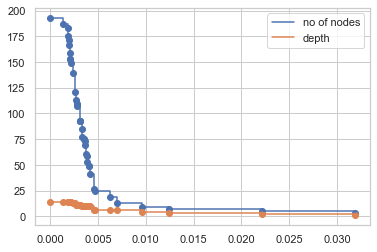

In [80]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

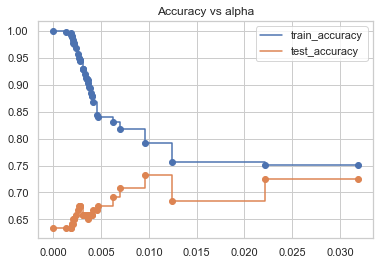

In [81]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [82]:
"""Instantiate the models with optimized hyperparameters."""
# Sort the dataframe by index and select bestHyperparameters column
tunedParams = bestScoreAndHyperparametersSorted.sort_index().loc[:,"bestHyperparameters"]
print(tunedParams)
dt  = DecisionTreeClassifier(**tunedParams["DT"],ccp_alpha=0.01)
lr  = LogisticRegression(**tunedParams["LR"])
rf  = RandomForestClassifier(**tunedParams["RF"])


"""Train all the models with optimised hyperparameters."""
models = [ dt ,lr, rf]
modelNames = tunedParams.index.values
keyValue = dict(zip(modelNames, models))
bold("10-fold Cross Validation after Optimization:")
xValScore = []
for key, value in keyValue.items():
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    value.fit(X_train, y_train)
    scores = cross_val_score(value, X_train, y_train, cv = 10, scoring="accuracy")*100
    xValScore.append(scores.mean())
    print("Mean Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), key))

DT    {'max_depth': 6, 'max_features': 'auto', 'min_...
LR    {'C': 1291.5496650148827, 'max_iter': 5000, 'p...
RF    {'criterion': 'entropy', 'max_depth': 4, 'max_...
Name: bestHyperparameters, dtype: object


**10-fold Cross Validation after Optimization:**

Mean Accuracy: 75.3502 (+/- 6.2408) [DT]
Mean Accuracy: 77.8679 (+/- 5.1301) [LR]
Mean Accuracy: 78.9140 (+/- 4.0019) [RF]


## Model Selection

In [83]:
"""Create a function that compares cross validation scores with tunned scores for different models by
plotting them."""
def compareModelsAccuracy():
    """Returns a stack bar chart of tuned and x validation scores of models."""
    
    # Sort by index and converting to series object to plot.
    xValScore = xValScoresSorted[~xValScoresSorted.index.isin(["XGBC","GNB"])].sort_index().T.squeeze()
    tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0].sort_index().T.squeeze()
    
    # Create two subplots of stack bar chart
    fig=make_subplots(
        rows=1, 
        cols=1,
        vertical_spacing=0.3,
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for stack bar
    fig.add_trace(go.Bar(x=xValScore.index,
                             y=xValScore,
                             text=xValScore,
                             hoverinfo="x+y",
                             textposition="auto",
                             name="xValScore",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )

    # Add another trace for stack bar
    fig.add_trace(go.Bar(x=tunedScore.index,
                             y=tunedScore,
                             text=tunedScore,
                             hoverinfo="x+y",
                             textposition="auto",
                             name="tunedScores",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )
        
    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=950,
        hovermode="closest",
        barmode = "stack",
        title_text = "Cross Vaidation Scores vs Optimized Scores",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis titles in bold
    fig.layout.yaxis1.update(title="<b>%Accuracy</b>")
    
    # Set x-axis title in bold
    fig.layout.xaxis1.update(title="<b>Models</b>")
    return fig.show()

"""Call the function to plot the scores."""
compareModelsAccuracy()

In [84]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

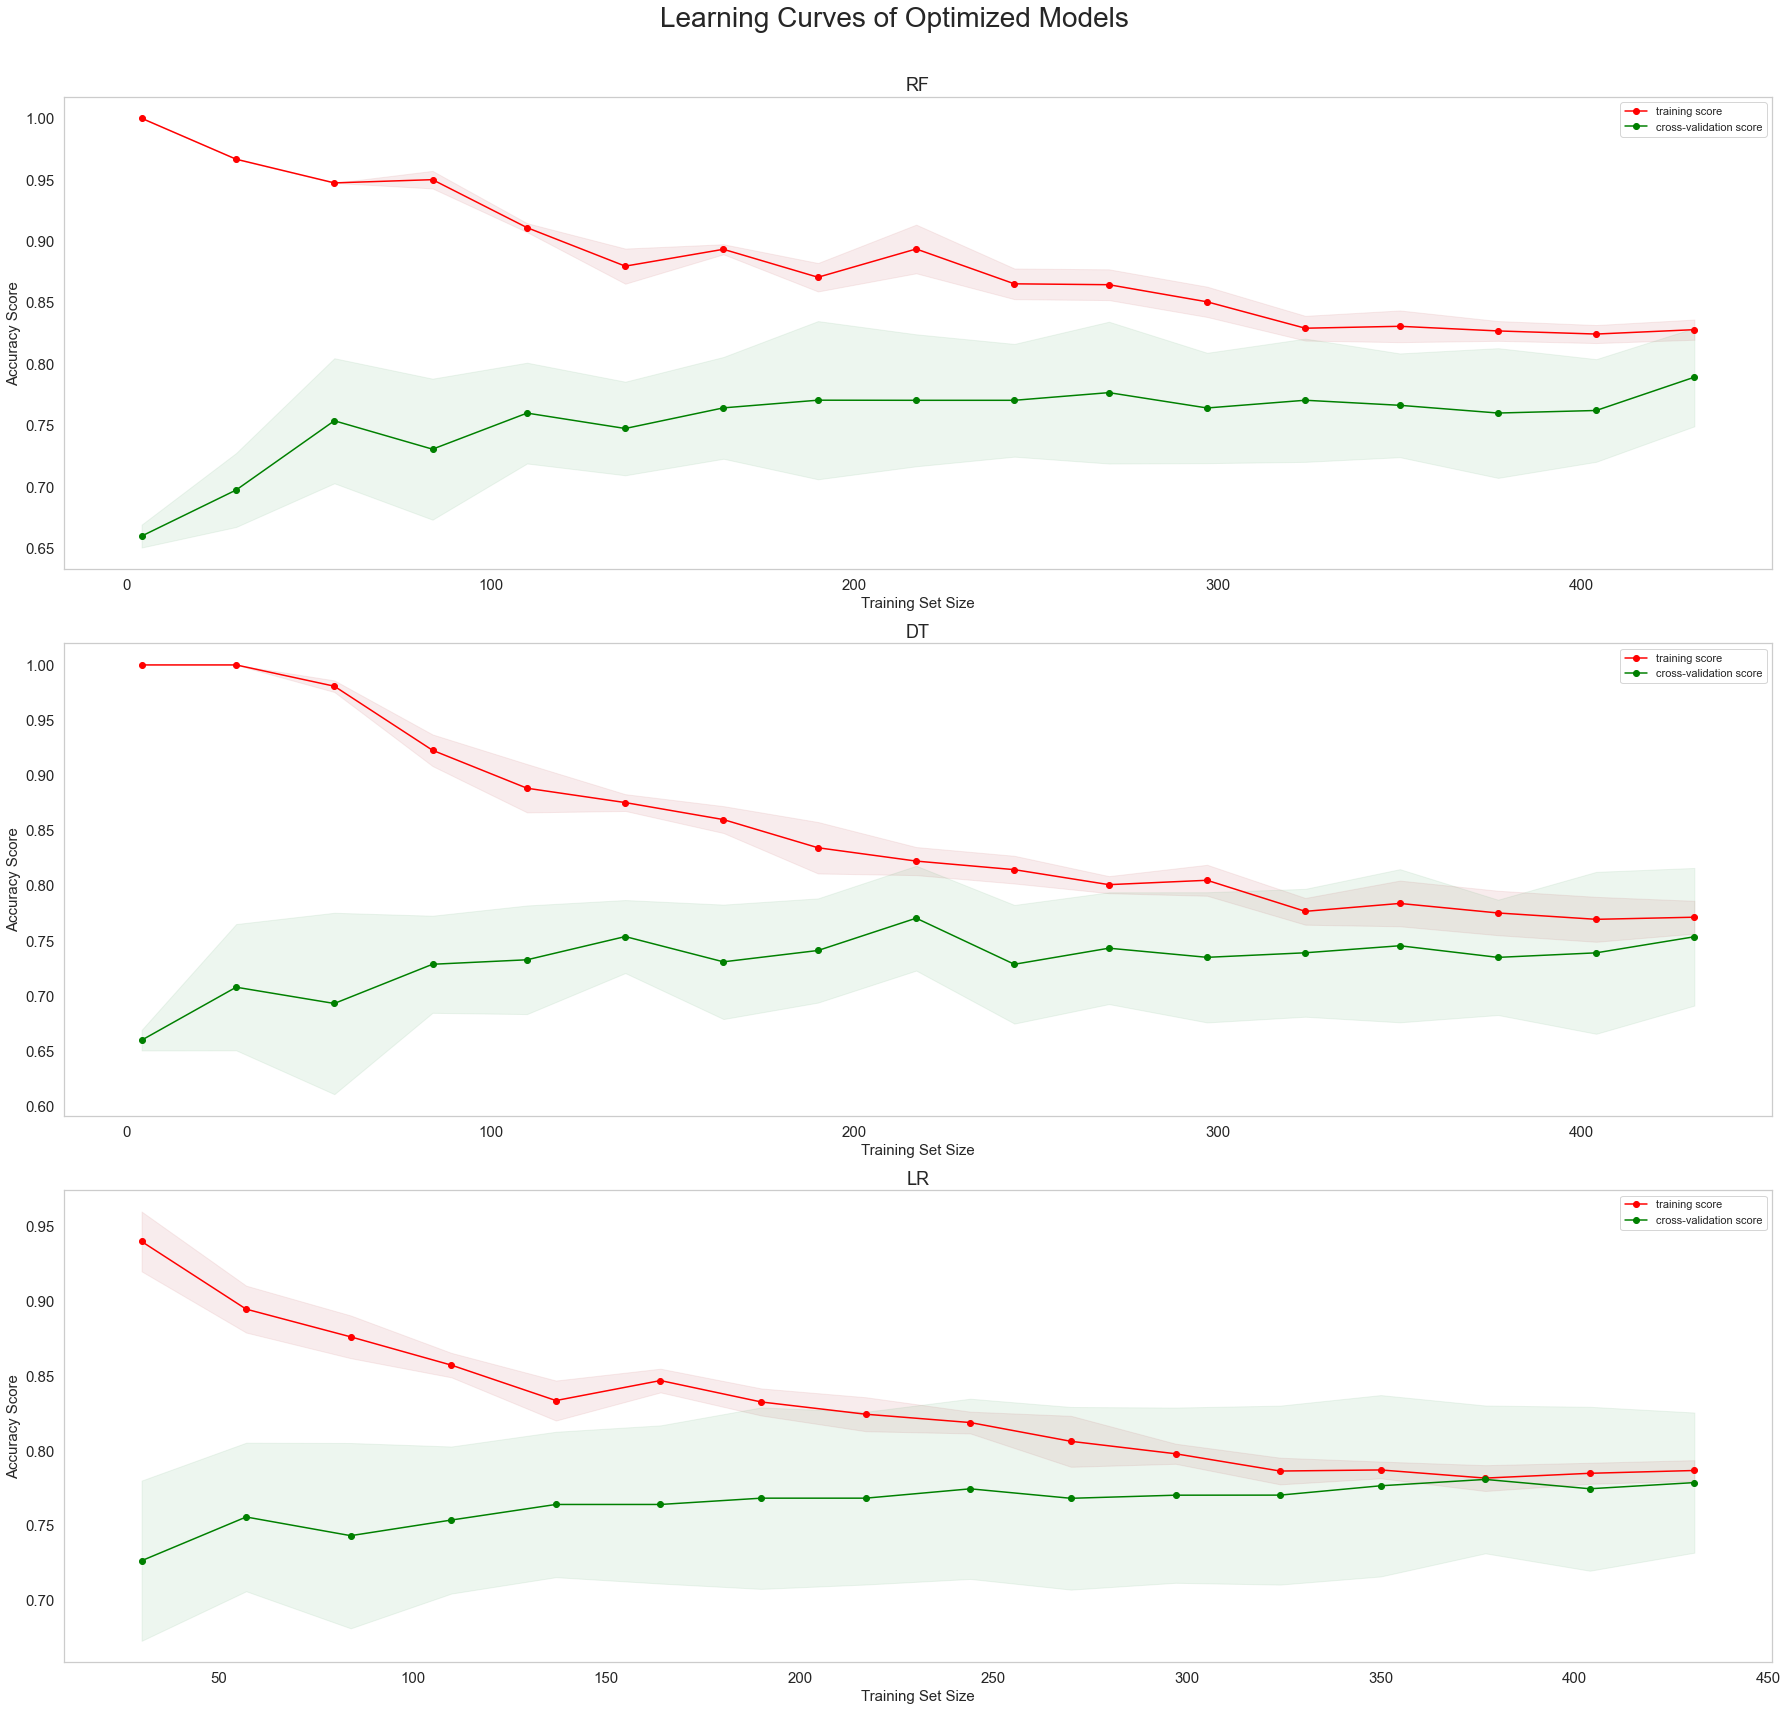

In [85]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [rf,  dt, lr]
lcLabels = ["RF", "DT", "LR"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(3,1,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# Classification Report 

In [86]:
"""Return prediction to use it in another function."""
def xValPredict(model):
    """Returns prediction by which we can calculate different classification metrices."""
    
    predicted = cross_val_predict(model, X_train, y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

"""Function to compute classification report."""
def calculateClassificationReport(model):
    """Returns a model"s classification report."""
    
    predicted = xValPredict(model)

    classificationReport = classification_report(y_train, predicted)
    
    return print(classificationReport)

"""Now calculate classification report for rf and gbc."""
bold("LR Classification Report:")
calculateClassificationReport(lr)
bold("RF Classification Report:")
calculateClassificationReport(rf)
bold("dt Classification Report:")
calculateClassificationReport(dt)

**LR Classification Report:**

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       316
           1       0.73      0.55      0.63       163

    accuracy                           0.78       479
   macro avg       0.76      0.72      0.74       479
weighted avg       0.77      0.78      0.77       479



**RF Classification Report:**

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       316
           1       0.77      0.55      0.64       163

    accuracy                           0.79       479
   macro avg       0.78      0.73      0.74       479
weighted avg       0.79      0.79      0.78       479



**dt Classification Report:**

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       316
           1       0.71      0.47      0.57       163

    accuracy                           0.75       479
   macro avg       0.74      0.69      0.70       479
weighted avg       0.75      0.75      0.74       479



## Prediction & Submission 

In [87]:

"""Submission with the most accurate gradient boosting classifier."""
submissionLR = pd.DataFrame({
        "Sepsis": lr.predict(X_train)})
submissionLR.to_csv("lfSubmission.csv", index = False)
"""Submission with the most accurate random forest classifier."""
submissionRF = pd.DataFrame({

        "Sepsis": rf.predict(X_train)})
submissionRF.to_csv("rfSubmission.csv", index = False)


"""Submission with the most accurate gradient boosting classifier."""
submissionGBC = pd.DataFrame({
        "Sepsis": dt.predict(X_train)})
submissionGBC.to_csv("dtSubmission.csv", index = False)


## ROC_AUC

In [88]:
from sklearn.metrics import roc_curve
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [ ]:

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()


In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_preds)